In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mK as mK
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.Get_groups import phase_diagram,make_meanr

from TO_sim.gen_Distribution import Normal
from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal
from TO_sim.gen_Distribution import Identical
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from tqdm.notebook import tqdm
from scipy.signal import find_peaks
import parmap
from scipy.optimize import curve_fit


In [89]:
seed =10
N = 5000
theta_random,omega,Kc = Normal(N,0,1,seed=seed)
omega = np.sort(omega)
m = 10
t = np.arange(0,6000,0.1)
K = 6
to_ppi = lambda y: (y + np.pi)%(2*np.pi) - np.pi
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta= omega,p_omega=omega)
new_theta = to_ppi(theta)
dtheta_c = np.cumsum(dtheta,axis=0)
sum_time = 500
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time

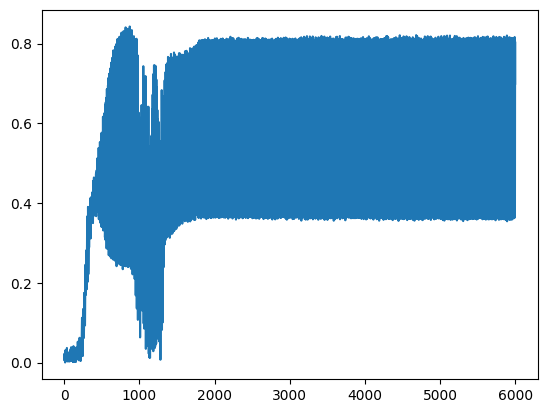

In [91]:
plt.plot(t,rs)

In [92]:
Z = 1/N *np.sum( np.exp(-1j*theta), axis=1)
psi = np.angle(Z)

KeyboardInterrupt: 

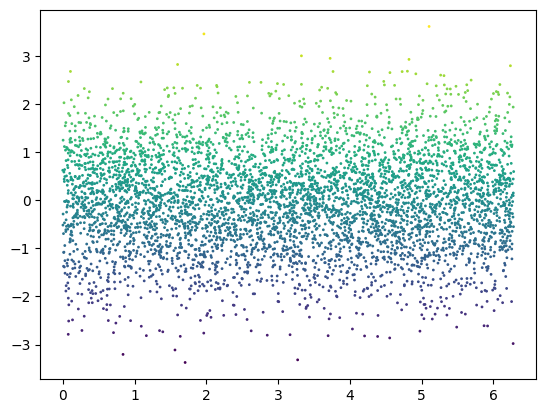

In [94]:
for i in range(1):
    plt.scatter(theta[-i,:]%(2*np.pi),dtheta[-i,:],s=1,c=omega)

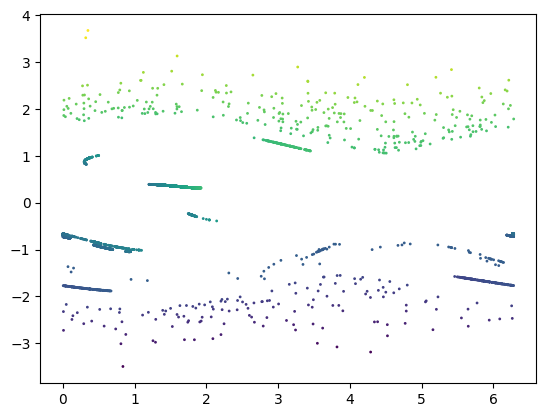

In [95]:
i = 1
plt.scatter(theta[-i,:]%(2*np.pi),dtheta[-i,:],s=1,c=omega)

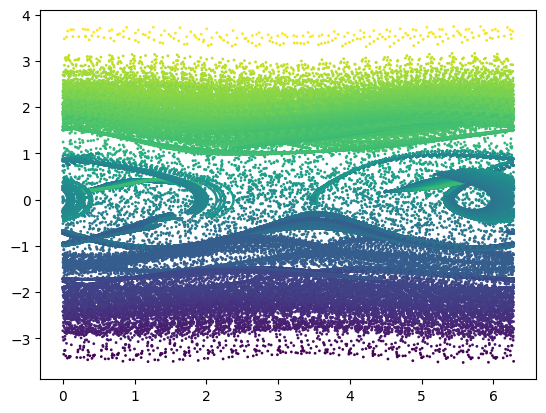

In [93]:
for i in range(100):
    plt.scatter(theta[-i,:]%(2*np.pi),dtheta[-i,:],s=1,c=omega)

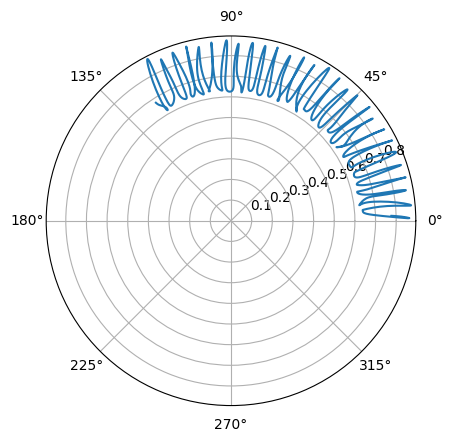

In [57]:
plt.polar(psi[-1500:],rs[-1500:])

In [96]:
rot_n = theta[-1]//(2*np.pi)


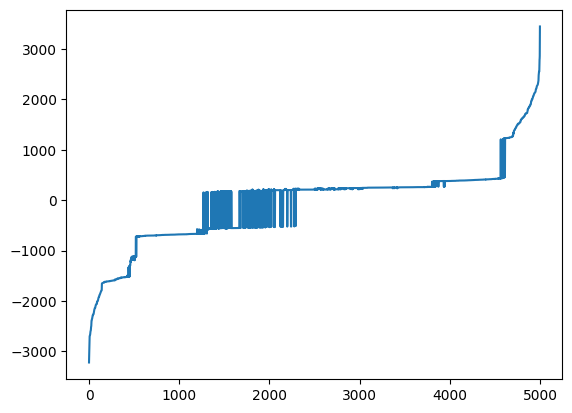

In [97]:
plt.plot(rot_n)


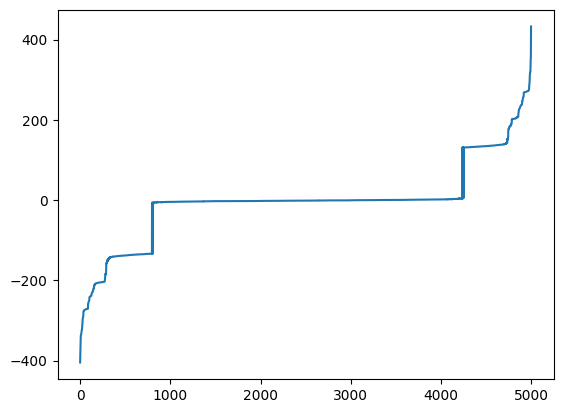

In [86]:
plt.plot(theta[-1]/t[-1])
# plt.plot(avg_dtheta[-1])

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_245/2236243991.py:1: RuntimeWarning: divide by zero encountered in divide
  plt.plot(2*np.pi / T_array)


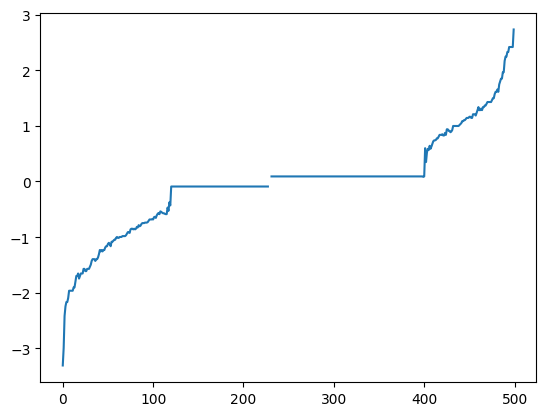

In [141]:
plt.plot(2*np.pi / T_array)

In [142]:
rot_n_T = theta//(2*np.pi)

In [143]:
rot_n_T[0].shape

(500,)

In [144]:
T_array

array([ -1.9,  -2.1,  -2.6,  -2.8,  -2.9,  -2.9,  -3. ,  -3.2,  -3.2,
        -3.2,  -3.2,  -3.2,  -3.3,  -3.3,  -3.5,  -3.7,  -3.7,  -3.8,
        -3.6,  -3.7,  -3.8,  -3.8,  -3.8,  -4. ,  -4. ,  -3.9,  -3.9,
        -4. ,  -4. ,  -4. ,  -4.1,  -4.2,  -4.4,  -4.5,  -4.5,  -4.5,
        -4.4,  -4.5,  -4.5,  -4.6,  -4.8,  -5.1,  -5. ,  -5.1,  -5. ,
        -5.1,  -5.1,  -5.3,  -5.4,  -5.4,  -5.6,  -5.7,  -5.6,  -5.4,
        -5.8,  -5.8,  -5.9,  -6. ,  -6. ,  -6.2,  -6.3,  -6.2,  -6.2,
        -6.3,  -6.3,  -6.3,  -6.4,  -6.4,  -6.4,  -6.4,  -6.5,  -6.7,
        -6.9,  -6.9,  -6.8,  -7.3,  -7.4,  -7.4,  -7.3,  -7.4,  -7.3,
        -7.4,  -7.7,  -7.6,  -8. ,  -7.8,  -7.9,  -8.2,  -8.4,  -8.4,
        -8.4,  -8.5,  -8.5,  -8.5,  -8.6,  -8.9,  -9.2,  -9.2,  -9.2,
        -9.3,  -9.2,  -9.8,  -9.9,  -9.6, -10.3, -10.8, -11.1, -10.7,
       -11.7, -11.5, -11.2, -11. , -11. , -10.8, -10.7, -10.7, -13.4,
       -11.9, -16.8, -14.6, -69.3, -69.3, -69.2, -69.2, -69.2, -69.2,
       -69.2, -69.2,

In [145]:
np.diff(np.where(abs(np.diff(rot_n_T[:,0]))==1))[-1][-1]

20

In [146]:
T_array = np.array([np.sign(rot_n_T[-1,i])*0.1*np.diff(np.where(abs(np.diff(rot_n_T[:,i]))==1))[-1][-1] for i in range(N)])

In [147]:
rot_n = theta[-1]//(2*np.pi)
rot_F = theta[-1]/rot_n

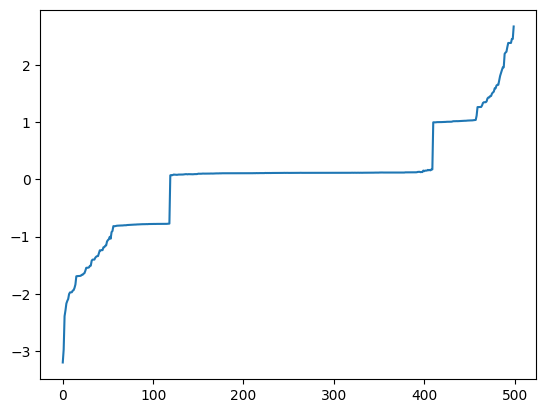

In [148]:
plt.plot(theta[-1]/t[-1])

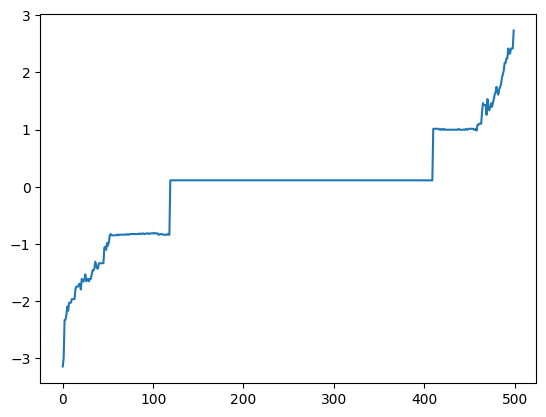

In [149]:
plt.plot(theta[-1]/rot_n/T_array)

In [150]:
a = np.random.default_rng(10)
mu = 0
sigma = (5-mu)/3
a.normal(mu,sigma,1)

array([-1.83889742])

In [151]:
r_sample = rs[-1000:]
t_sample = t[-1000:]

In [176]:
func = lambda t,r1,epsilon,omega_r,b: r1+epsilon*np.cos(omega_r*t+b)

In [182]:
popt, pcov = curve_fit(func,t_sample,r_sample,bounds=([0,0.15,0,-np.pi/2],[1,2,3,np.pi/2]))
popt

array([ 0.51994948,  0.15      ,  1.50025147, -1.57079106])

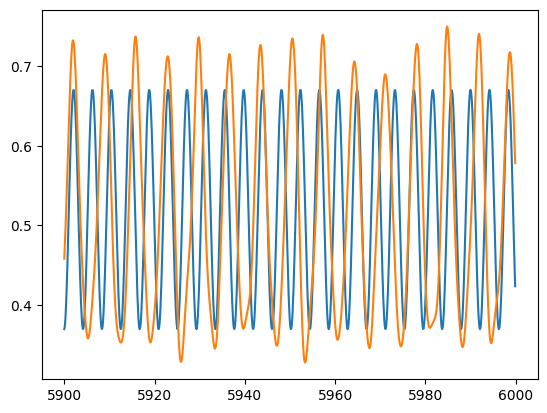

In [183]:
plt.plot(t_sample,func(t_sample,*popt))
plt.plot(t_sample,r_sample)

## identical oscillator

In [12]:
seed = 9
N = 500
theta_random,omega,Kc = Identical(N,0,1,seed=seed)
omega = np.sort(omega)
m = 10
t = np.arange(0,5000,0.1)
K = 0.01
to_ppi = lambda y: (y + np.pi)%(2*np.pi) - np.pi
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta= omega,p_omega=omega)
new_theta = to_ppi(theta)
dtheta_c = np.cumsum(dtheta,axis=0)
sum_time = 500
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time

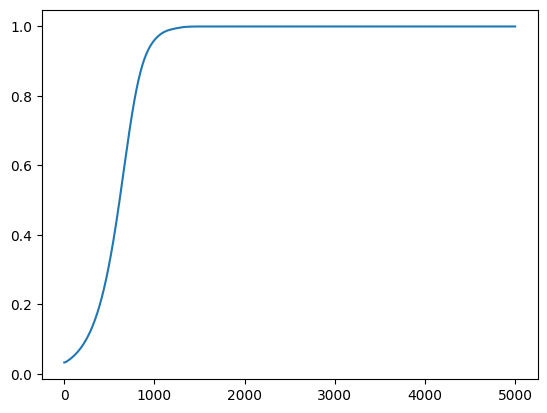

In [13]:
plt.plot(t,rs)

In [14]:
func = lambda t,A,tau,B: A*np.exp(-tau*t+B)

In [15]:
t_sample= t[np.where(rs<0.65)]
r_sample= rs[np.where(rs<0.65)]

In [16]:
popt, pcov = curve_fit(func,t_sample,r_sample)
popt

array([ 1.48671309, -0.00413203, -3.64157619])

In [17]:
-0.0411422 , -0.0402376 , -0.0405136
-0.03952098
-0.03488932

-0.0313984

-0.01524909 -0.01504177

-0.03029086

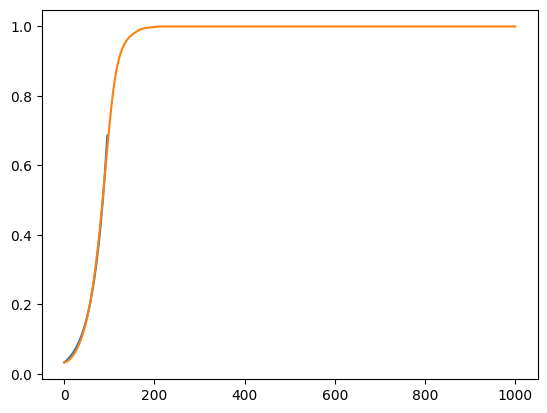

In [354]:
plt.plot(t_sample,func(t_sample,*popt))
plt.plot(t,rs)
# plt.xscale('log')
# plt.yscale('log')